# Feature Selection/Extraction
In this lab session we will use the library scikit-learn to work with the titanic dataset we will apply some feature selection techniques and experiment with dimensionality reduction by using:
1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

We load the titanic data from scikit learn, the `X` data contains information about the passengers on board the titanic, we will be using that data to predict the class `y`, which tells us if a passenger survives the accident or not. 
The details on the different features name and definition can be found here: https://www.kaggle.com/c/titanic/data 

In [2]:
# load the data here by using fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

## Question 1
Use the functions `head()`, `info()`, `describe()` from the `pandas` library to explore the different features and assess their type (categorical, scalar) and possible missing values (e.g., NaN)

In [3]:
# example
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


### Question 2
Now, we are going to drop the `name` and `ticket` features which are not very informative (although the name may contain a noble or religious title). For that we use the function `drop()` 

In [4]:
X.drop(['name', 'ticket'], axis=1, inplace=True)

### Question 3
Check if any of the remaining features have missing values using `isnull()` and remove those with missing value ratios above 25% using the function `drop()` from `pandas`. 

In [5]:
print(X.isnull().mean())

pclass       0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64


In [6]:
X.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
print(X.isnull().mean())

pclass      0.000000
sex         0.000000
age         0.200917
sibsp       0.000000
parch       0.000000
fare        0.000764
embarked    0.001528
dtype: float64


### Question 4
There remain features with missing values. Here we decide to drop these data (persons) from the list using the function `notnull()` to find the indices of the remaining data.

In [7]:
idx = X.notnull().all(axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   sex       1309 non-null   category
 2   age       1046 non-null   float64 
 3   sibsp     1309 non-null   int64   
 4   parch     1309 non-null   int64   
 5   fare      1308 non-null   float64 
 6   embarked  1307 non-null   category
dtypes: category(2), float64(2), int64(3)
memory usage: 54.1 KB


In [8]:
y = y[idx]
X = X[idx]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1043 non-null   int64   
 1   sex       1043 non-null   category
 2   age       1043 non-null   float64 
 3   sibsp     1043 non-null   int64   
 4   parch     1043 non-null   int64   
 5   fare      1043 non-null   float64 
 6   embarked  1043 non-null   category
dtypes: category(2), float64(2), int64(3)
memory usage: 51.2 KB


### Question 5
Check which features are categorical and which are numerical. For the `sex` variable, which is binary, we will simple use 0's and 1's. For the `embarked` variable, we want to code a one-hot encoding. 

In [9]:
X.describe()
#X.dtypes

,pclass,age,sibsp,parch,fare
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,29.813199,0.504314,0.421860,36.603024
std,0.840685,14.366261,0.913080,0.840655,55.753648
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.750000
75%,3.000000,39.000000,1.000000,1.000000,35.077100
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
X['sex'] = X['sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [11]:
# Get one hot encoding of column `embarked``
one_hot = pd.get_dummies(X['embarked'], dtype=int)

# Join the encoded X
X = X.join(one_hot)

# Drop the column `embarked`
X.drop(['embarked'], axis=1, inplace=True)


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1043 non-null   int64  
 1   sex     1043 non-null   int64  
 2   age     1043 non-null   float64
 3   sibsp   1043 non-null   int64  
 4   parch   1043 non-null   int64  
 5   fare    1043 non-null   float64
 6   C       1043 non-null   int64  
 7   Q       1043 non-null   int64  
 8   S       1043 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 81.5 KB


### Question 6
Split `X` and `y` into training and testing sets with 20% of the data in the testing set by using `rain_test_split()` from `sklearn`.

In [13]:
# split the data here by using t
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

### Question 7
We will now train a classifier on the training dataset. 
For that, we will use a pipeline that preprocesses the data and then fits it into a classifier.

The idea is to try different classifiers:
- `LogisticRegression()`
- `SVC(kernel='linear')`
- `KNeighborsClassifier(n_neighbors=3)`
- `DecisionTreeClassifier()`
- `RandomForestClassifier()`

Which one give the best results?

In [14]:
model = Pipeline(steps=[
    ('normalizer', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [15]:
# Fit the training set here
model.fit(X_train, y_train)

# Predict the class of the testing dataset
y_predict = model.predict(X_test)

# Assess the quality of the prediction
print("Number of errors:", np.sum(y_predict != y_test))

Number of errors: 55


In [16]:
def plot_decision_boundaries(model, X, ypred, ytrue):                                                                      
    _, ax = plt.subplots()
    
    # Plot decision boundary of the model
    DecisionBoundaryDisplay.from_estimator(
        model,
        X[:, :2],
        ax=ax,
        cmap='cool',
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot the testing points
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=ytrue.astype(float),
        marker='o',
        cmap='jet',
    )
    
    # Plot the predicted points
    plt.scatter(
        X[ypred != ytrue, 0],
        X[ypred != ytrue, 1],
        c=ypred[ypred != ytrue].astype(float),
        marker='*',
        cmap='jet',
    )
    

### Question 8
Redo question 7, but apply PCA to the preprocessed data before fitting it to reduce the dimension of the features, change the number of components used in PCA and check how that affects the testing accuracy.

In [17]:
pca = PCA(n_components=2) 
pca.fit(X_train)
Xnew_train = pca.transform(X_train)
Xnew_test = pca.transform(X_test)

In [18]:
model = Pipeline(steps=[
    ('normalizer', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [19]:
# Fit the training set here
model.fit(Xnew_train, y_train)

# Predict the class of the testing dataset
ynew_predict = model.predict(Xnew_test)

# Assess the quality of the prediction
print("Number of errors:", np.sum(ynew_predict != y_test))

Number of errors: 68


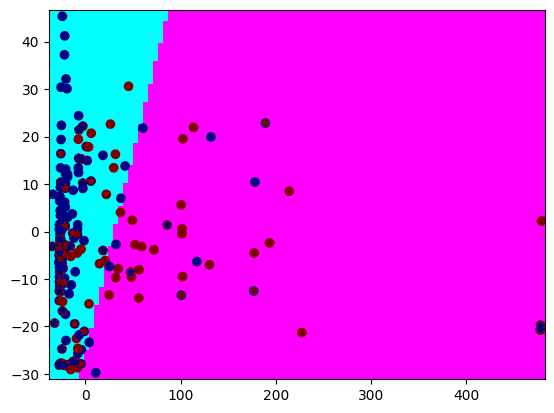

In [20]:
plot_decision_boundaries(model, Xnew_test, y_predict, y_test)